In [14]:
%load_ext autoreload
%autoreload 2

import util as yu
from util import *
import util_moments as yum
import sympy as sp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# check Eqs A1~A8 in Alexandrou:2020sml

In [156]:
m=sp.symbols('m')
[px,py,pz]=sp.symbols('px py pz')
xE=sp.symbols('E')

def replace(t):
    if type(t) in [list,np.ndarray]:
        return [replace(e) for e in t]
    t=t.subs({sp.symbols('K'):1})
    t=sp.expand(sp.sympify(t))
    t=t.subs({px**2:xE**2-py**2-pz**2-m**2})
    t=sp.expand(sp.sympify(t))
    t=sp.nsimplify(t)
    return t

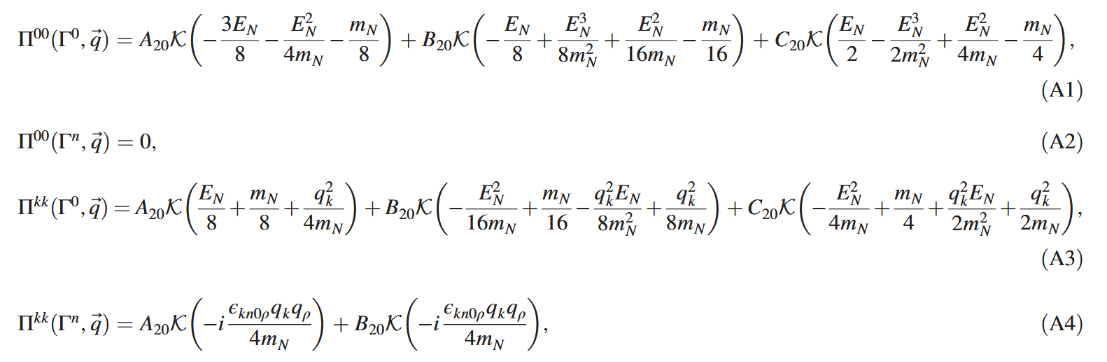

In [149]:
res=yum.ME2FF(m,[px,py,pz],[0,0,0],'P0','tt'); res=replace(res); [print(t,end=';\t') for t in res]; print() # A1
res=yum.ME2FF(m,[px,py,pz],[0,0,0],'Pz','tt'); res=replace(res); [print(t,end=';\t') for t in res]; print() # A2
res=yum.ME2FF(m,[px,py,pz],[0,0,0],'P0','zz'); res=replace(res); [print(t,end=';\t') for t in res]; print() # A3
res=yum.ME2FF(m,[px,py,pz],[0,0,0],'Py','zz'); res=replace(res); [print(t,end=';\t') for t in res]; print() # A4

-E**2/(4*m) - 3*E/8 - m/8;	E**3/(8*m**2) + E**2/(16*m) - E/8 - m/16;	-E**3/(2*m**2) + E**2/(4*m) + E/2 - m/4;	
0;	0;	0;	
E/8 + m/8 + pz**2/(4*m);	-E**2/(16*m) - E*pz**2/(8*m**2) + m/16 + pz**2/(8*m);	-E**2/(4*m) + E*pz**2/(2*m**2) + m/4 + pz**2/(2*m);	
I*px*pz/(4*m);	I*px*pz/(4*m);	0;	


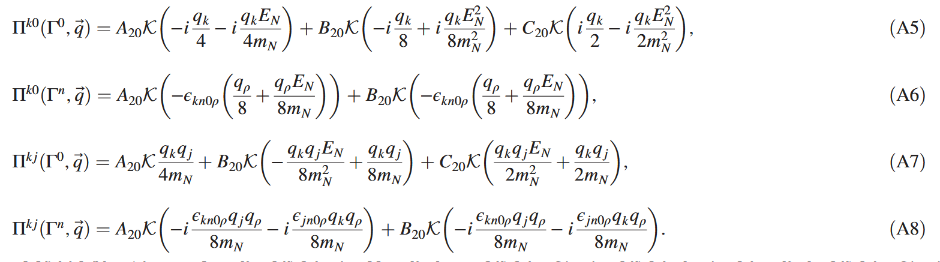

In [151]:
# my convention: q=p while paper convention q=-p
res=yum.ME2FF(m,[px,py,pz],[0,0,0],'P0','zt'); res=replace(res); [print(t,end=';\t') for t in res]; print() # A5
res=yum.ME2FF(m,[px,py,pz],[0,0,0],'Py','zt'); res=replace(res); [print(t,end=';\t') for t in res]; print() # A6 # n=y,k=z; ep_zy0x=ep_0zyx=ep_0xzy=-1
res=yum.ME2FF(m,[px,py,pz],[0,0,0],'P0','yz'); res=replace(res); [print(t,end=';\t') for t in res]; print() # A7
res=yum.ME2FF(m,[px,py,pz],[0,0,0],'Py','yz'); res=replace(res); [print(t,end=';\t') for t in res]; print() # A8.1 # ep_yy0r=0, ep_zy0x=-1
res=yum.ME2FF(m,[px,py,pz],[0,0,0],'Px','yz'); res=replace(res); [print(t,end=';\t') for t in res]; print() # A8.2 # ep_yx0z=-1, ep_zx0y=+1

I*E*pz/(4*m) + I*pz/4;	-I*E**2*pz/(8*m**2) + I*pz/8;	I*E**2*pz/(2*m**2) - I*pz/2;	
-E*px/(8*m) - px/8;	-E*px/(8*m) - px/8;	0;	
py*pz/(4*m);	-E*py*pz/(8*m**2) + py*pz/(8*m);	E*py*pz/(2*m**2) + py*pz/(2*m);	
I*px*py/(8*m);	I*px*py/(8*m);	0;	
-I*py**2/(8*m) + I*pz**2/(8*m);	-I*py**2/(8*m) + I*pz**2/(8*m);	0;	
